In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
from matplotlib import pyplot as plt
import scvelo as scv
import anndata as ad
import seaborn as sns

In [2]:
sc.settings.verbosity=3
sc.logging.print_header()

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.3 louvain==0.8.0 pynndescent==0.5.8


In [3]:
oviduct = sc.read_h5ad('/home/j87832lw/mounting/oviduct/oviduct.all/oviductepitheliumforconcat.h5ad')

In [4]:
oviduct.var_names_make_unique()

In [5]:
oviduct

AnnData object with n_obs × n_vars = 14630 × 3100
    obs: 'Author', 'BioSample', 'Patient', 'Run', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types', 'menstrual_status', 'Age', 'cycle_day', 'Tissuelocation', 'n_counts', 'velocity_self_transition', 'epithelial_celltypes', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std', 'velocity_offset2', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Author_colors', 'Cell_Types_colors', 'dendrogram_epithelial_celltypes', 'epithelial_celltypes_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap', 'velocity_graph', 'vel

In [7]:
oviduct.obs['epithelial_celltypes']

CellID
SRR14804445:AAACCCAGTACCCACGx                         Progenitor
SRR14804445:AACAAAGAGGTCCTGCx                    OVGP1+ ciliated
SRR14804445:AAAGGTACAGCCTTCTx                         Progenitor
SRR14804445:AAAGTGAAGGCACAACx                    OVGP1+ ciliated
SRR14804445:AAACCCACAATTCTCTx                    LGR5+ secretory
                                                    ...         
SRR10308430_KMODB:SRR10308430.sorted.bam              Progenitor
SRR10308725_MAY3G:SRR10308725.sorted.bam         LGR5+ secretory
SRR10308756_S29MY:SRR10308756.sorted.bam        Mature secretory
SRR10309139_FKI51:SRR10309139.sorted.bam    Mature multiciliated
SRR10308566_BT0CU:SRR10308566.sorted.bam        Mature secretory
Name: epithelial_celltypes, Length: 14630, dtype: category
Categories (8, object): ['LGR5+ secretory', 'Mature multiciliated', 'Mature secretory', 'Mature secretory (Primary cilia)', 'OVGP1+ ciliated', 'Pre-ciliated-1', 'Pre-ciliated-2', 'Progenitor']

In [8]:
endo  = sc.read_h5ad('/home/j87832lw/mounting/oviduct/oviduct.all/endometrialepithelialclusteringfinalforconcat.h5ad')

In [9]:
endo.var_names_make_unique()

In [10]:
endo.obs['epithelial_celltypes']

CellID
SRR11869240:AAAGGGCCATGGAGACx                SOX9+ LGR5-
SRR11869240:AAAGGTATCTCGGTCTx                SOX9+ LGR5-
SRR11869240:AAAGGTACAAAGTGTAx                SOX9+ LGR5-
SRR11869240:AAAGGATCAAGTTTGCx        Glandular Secretory
SRR11869240:AAACCCATCAACACCAx        Glandular Secretory
                                            ...         
MRC_Endo8625698:TTAGTCTAGGTCTGGAx    Glandular Secretory
MRC_Endo8625698:TTCCTCTCAACTCGATx    Glandular Secretory
MRC_Endo8625698:TTCCTTCGTTCCACGGx           Pre-Ciliated
MRC_Endo8625698:TTCTGTAGTCAGGTAGx    Glandular Secretory
MRC_Endo8625698:TTTACGTGTGACTAAAx    Glandular Secretory
Name: epithelial_celltypes, Length: 58463, dtype: category
Categories (11, object): ['Ciliated (endometrial)', 'Ciliated LGR5+', 'Glandular', 'Glandular Secretory', ..., 'Pre-Ciliated', 'Proliferative SOX9+', 'SOX9+ LGR5+', 'SOX9+ LGR5-']

In [11]:
oviduct = oviduct[~oviduct.obs['Patient'].isnull()]

In [12]:
oviendo = ad.concat([oviduct, endo], axis=0, join='inner')

In [14]:
oviendo

AnnData object with n_obs × n_vars = 73093 × 1386
    obs: 'Author', 'Patient', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'leiden', 'Cell_Types', 'menstrual_status', 'Age', 'cycle_day', 'n_counts', 'velocity_self_transition', 'epithelial_celltypes'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [13]:
oviendo.obs['Cell_Types']

CellID
SRR14804445:AAACCCAGTACCCACGx                  Secretory
SRR14804445:AACAAAGAGGTCCTGCx                   Ciliated
SRR14804445:AAAGGTACAGCCTTCTx                  Secretory
SRR14804445:AAAGTGAAGGCACAACx                   Ciliated
SRR14804445:AAACCCACAATTCTCTx                  Secretory
                                            ...         
MRC_Endo8625698:TTAGTCTAGGTCTGGAx    Glandular Secretory
MRC_Endo8625698:TTCCTCTCAACTCGATx    Glandular Secretory
MRC_Endo8625698:TTCCTTCGTTCCACGGx           Pre-Ciliated
MRC_Endo8625698:TTCTGTAGTCAGGTAGx    Glandular Secretory
MRC_Endo8625698:TTTACGTGTGACTAAAx    Glandular Secretory
Name: Cell_Types, Length: 73093, dtype: category
Categories (13, object): ['Ciliated', 'Ciliated (endometrial)', 'Ciliated LGR5+', 'Glandular', ..., 'Proliferative SOX9+', 'SOX9+ LGR5+', 'SOX9+ LGR5-', 'Secretory']

In [14]:
broad_celltypedict={'Ciliated Endometrium':['Ciliated (endometrial)','Ciliated LGR5+','Pre-Ciliated'],
                 'Ciliated Fallopian Tube':['Mature multiciliated','OVGP1+ ciliated','Pre-ciliated-1','Pre-ciliated-2'],
                 'Secretory Fallopian Tube':['Mature secretory (Primary cilia)','Mature secretory','LGR5+ secretory'], 
                 'Glandular Secretory Endometrium':['SOX9+ LGR5-','Proliferative SOX9+','Glandular','Glandular Secretory'],
                 'Progenitor Fallopian Tube':['Progenitor'],
                 'LGR5+ Progenitor Endometrium':['SOX9+ LGR5+'],
                 'Lumenal Secretory Endometrium':['Lumenal 1','Lumenal 2','Lumenal 3']}


In [15]:
oviendo.obs['broad_celltypes'] = np.nan

In [16]:
for i in broad_celltypedict.keys():
    ind = pd.Series(oviendo.obs.epithelial_celltypes).isin(broad_celltypedict[i])
    oviendo.obs.loc[ind,'broad_celltypes'] = i

In [17]:
oviendo.obs['broad_celltypes']


CellID
SRR14804445:AAACCCAGTACCCACGx        Progenitor Fallopian Tube
SRR14804445:AACAAAGAGGTCCTGCx          Ciliated Fallopian Tube
SRR14804445:AAAGGTACAGCCTTCTx        Progenitor Fallopian Tube
SRR14804445:AAAGTGAAGGCACAACx          Ciliated Fallopian Tube
SRR14804445:AAACCCACAATTCTCTx         Secretory Fallopian Tube
                                               ...            
MRC_Endo8625698:TTAGTCTAGGTCTGGAx        Secretory Endometrium
MRC_Endo8625698:TTCCTCTCAACTCGATx        Secretory Endometrium
MRC_Endo8625698:TTCCTTCGTTCCACGGx         Ciliated Endometrium
MRC_Endo8625698:TTCTGTAGTCAGGTAGx        Secretory Endometrium
MRC_Endo8625698:TTTACGTGTGACTAAAx        Secretory Endometrium
Name: broad_celltypes, Length: 73093, dtype: object

In [18]:
epithelialcelltypes_dict= {'Ciliated (Endometrial)':['Ciliated (endometrial)'],
                           'Ciliated LGR5+ (Endometrial)':['Ciliated LGR5+'],
                           'Pre-Ciliated (Endometrial)':['Pre-Ciliated'],
                            'Mature multiciliated (Fallopian Tube)':['Mature multiciliated'],
                           'OVGP1+ ciliated (Fallopian Tube)':['OVGP1+ ciliated'],
                           'Pre-ciliated (Fallopian Tube)': ['Pre-ciliated (Fallopian tube)'],
                            'Mature secretory/Primary cilia (Fallopian Tube)':['Mature secretory (Primary cilia)'],
                            'Mature secretory (Fallopian Tube)':['Mature secretory'],
                           'SOX9+ LGR5- (Endometrial)':['SOX9+ LGR5-'],
                            'Proliferative SOX9+ (Endometrial)' :['Proliferative SOX9+'],
                            'Glandular (Endometrial)':['Glandular'],
                           'Glandular Secretory (Endometrial)':['Glandular Secretory'],
                            'LGR5+ secretory (Fallopian Tube)':['LGR5+ secretory'],
                           'Progenitor (Fallopian Tube)':['Progenitor'],
                           'SOX9+ LGR5+ (Endometrial)':['SOX9+ LGR5+'],
                           'Lumenal 1 (Endometrial)':['Lumenal 1'],
                           'Lumenal 2 (Endometrial)':['Lumenal 2','Lumenal 3']}

In [19]:
oviendo.obs['epithelialcelltypes_tissue'] = np.nan

for i in epithelialcelltypes_dict.keys():
    ind = pd.Series(oviendo.obs.epithelial_celltypes).isin(epithelialcelltypes_dict[i])
    oviendo.obs.loc[ind,'epithelialcelltypes_tissue'] = i

In [20]:
oviendo.obs['epithelialcelltypes_tissue']

CellID
SRR14804445:AAACCCAGTACCCACGx              Progenitor (Fallopian Tube)
SRR14804445:AACAAAGAGGTCCTGCx         OVGP1+ ciliated (Fallopian Tube)
SRR14804445:AAAGGTACAGCCTTCTx              Progenitor (Fallopian Tube)
SRR14804445:AAAGTGAAGGCACAACx         OVGP1+ ciliated (Fallopian Tube)
SRR14804445:AAACCCACAATTCTCTx         LGR5+ secretory (Fallopian Tube)
                                                   ...                
MRC_Endo8625698:TTAGTCTAGGTCTGGAx    Glandular Secretory (Endometrial)
MRC_Endo8625698:TTCCTCTCAACTCGATx    Glandular Secretory (Endometrial)
MRC_Endo8625698:TTCCTTCGTTCCACGGx           Pre-Ciliated (Endometrial)
MRC_Endo8625698:TTCTGTAGTCAGGTAGx    Glandular Secretory (Endometrial)
MRC_Endo8625698:TTTACGTGTGACTAAAx    Glandular Secretory (Endometrial)
Name: epithelialcelltypes_tissue, Length: 73093, dtype: object

In [21]:
tissue = {'Endometrium':['GA','Wang'],
          'Fallopian Tube':['Dinh_2021','Hu_2020','Ulrich_2022']}

In [22]:
oviendo.obs['Tissue_type'] = np.nan

In [23]:
for i in tissue.keys():
    ind = pd.Series(oviendo.obs.Author).isin(tissue[i])
    oviendo.obs.loc[ind,'Tissue_type'] = i

In [26]:
sc.pp.combat(oviendo, key='Tissue')

Standardizing Data across genes.

Found 11 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



computing PCA
    with n_comps=150
    finished (0:00:27)
computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:10)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:10)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:11)
--> added 'pos', the PAGA positions (adata.uns['paga'])


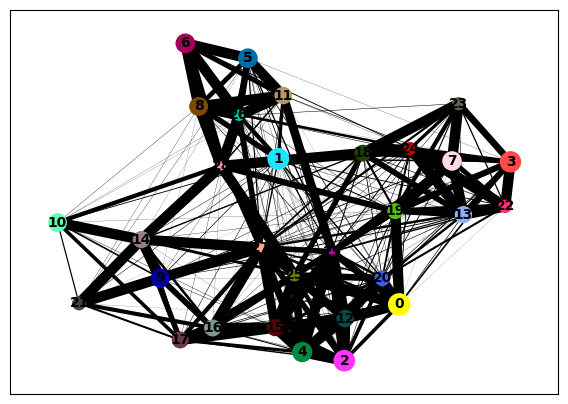

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:32)


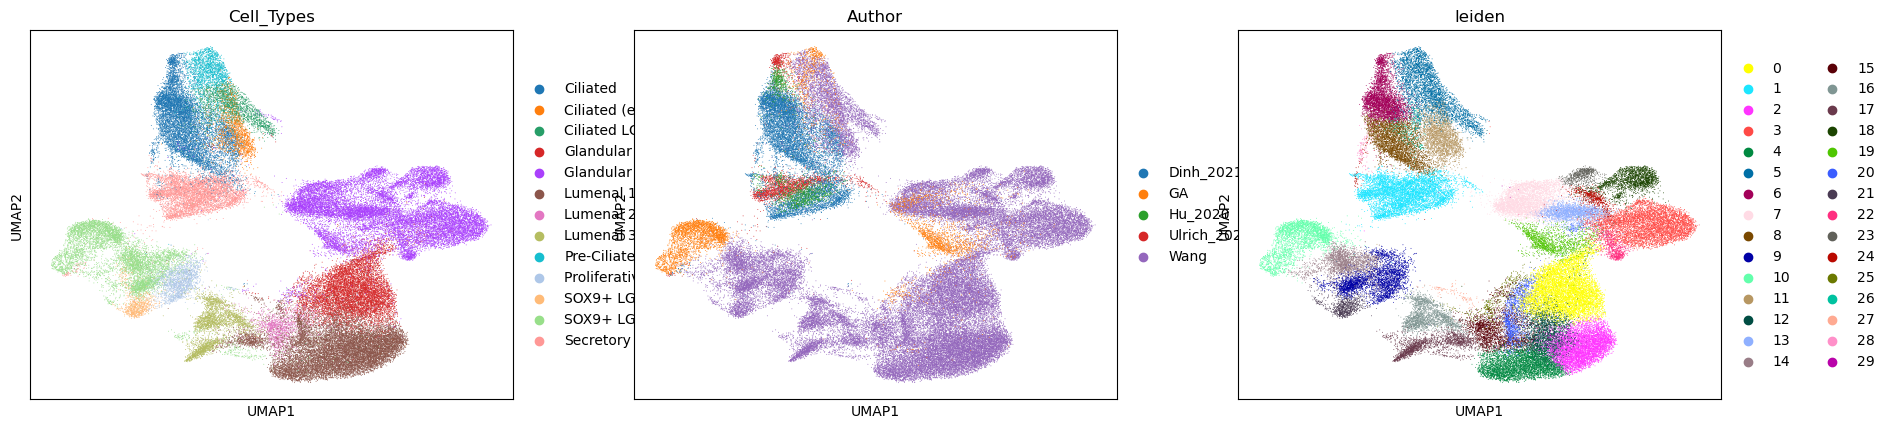

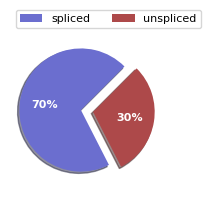

computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:14) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/28 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:17:37) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:47) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


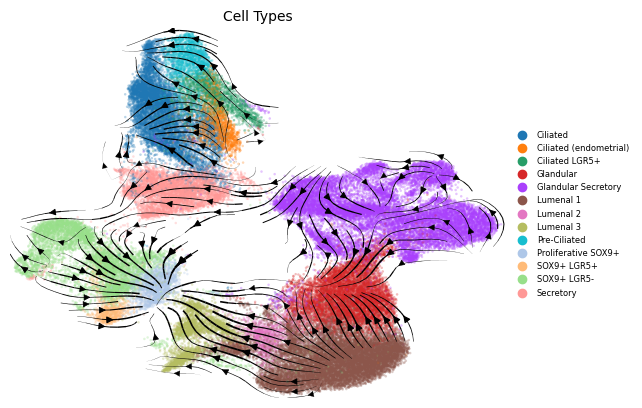

In [24]:
sc.tl.pca(oviendo, svd_solver='arpack', n_comps=150)
sc.pp.neighbors(oviendo, n_neighbors=200, n_pcs=25)
sc.tl.leiden(oviendo,resolution=1.7)

sc.tl.paga(oviendo)
sc.pl.paga(oviendo)
sc.tl.umap(oviendo, init_pos='paga')


sc.pl.umap(oviendo, color=['Cell_Types','Author','leiden'])
scv.pl.proportions(oviendo)
scv.pp.moments(oviendo)
scv.tl.velocity(oviendo, fit_offset2=True)
scv.tl.velocity_graph(oviendo)
scv.pl.velocity_embedding_stream(oviendo, basis='umap', color='Cell_Types',
                                 legend_fontsize='6', legend_loc='right margin')

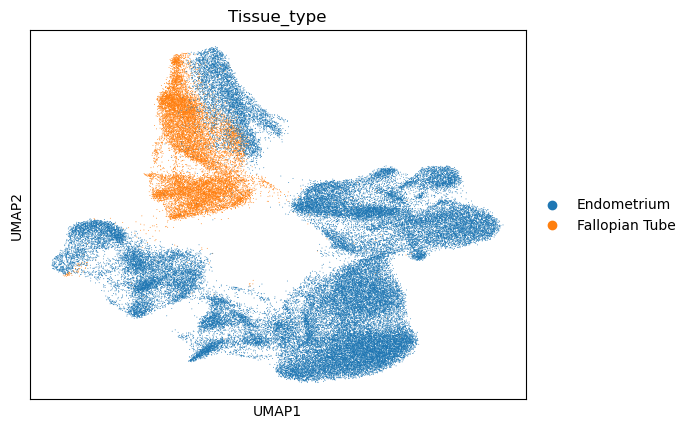

In [143]:
sc.pl.umap(oviendo, color=['Tissue_type'], save = 'fullepithelialsettissuetypelabels.png' )

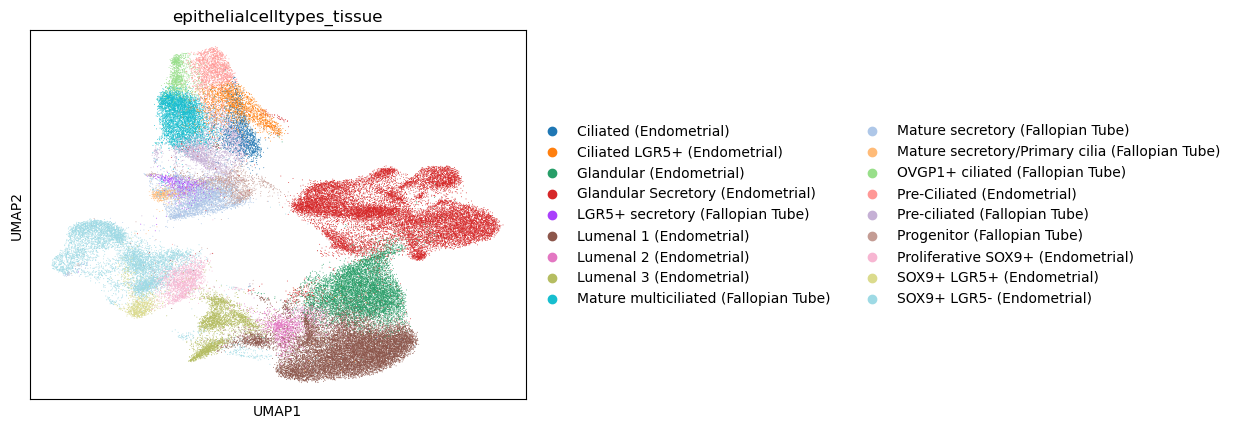

In [147]:
sc.pl.umap(oviendo, color=['epithelialcelltypes_tissue'], save = 'fullepithelialcelltypestissuelabels.png' )

In [152]:
marker_genes= ['TPPP3','FOXJ1','PIFO','CFAP157','C9orf24','SPAG6','OVGP1','CRISP3','PGR','CXCL2','NOTCH2','ATP2B4','C3','LGR5','BCAM','MSLN','VPS4A','SMO','FGFR1','PTCH1','MYC','ARMC4','DNAI1','LRRC6','PAEP']

In [153]:
sc.tl.dendrogram(oviendo, groupby='epithelialcelltypes_tissue')

    using 'X_pca' with n_pcs = 150
Storing dendrogram info using `.uns['dendrogram_epithelialcelltypes_tissue']`


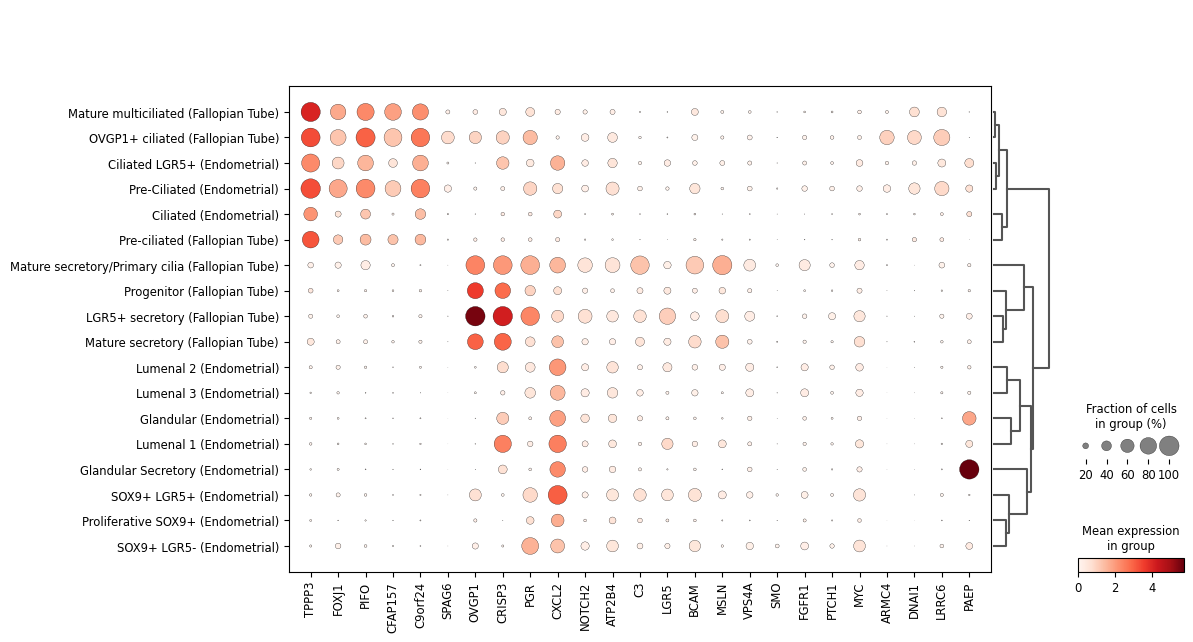

In [154]:
sc.pl.dotplot(oviendo, marker_genes, groupby='epithelialcelltypes_tissue', dendrogram=True, save = 'oviendoepithelialcelltypemarkersdotplot.png')

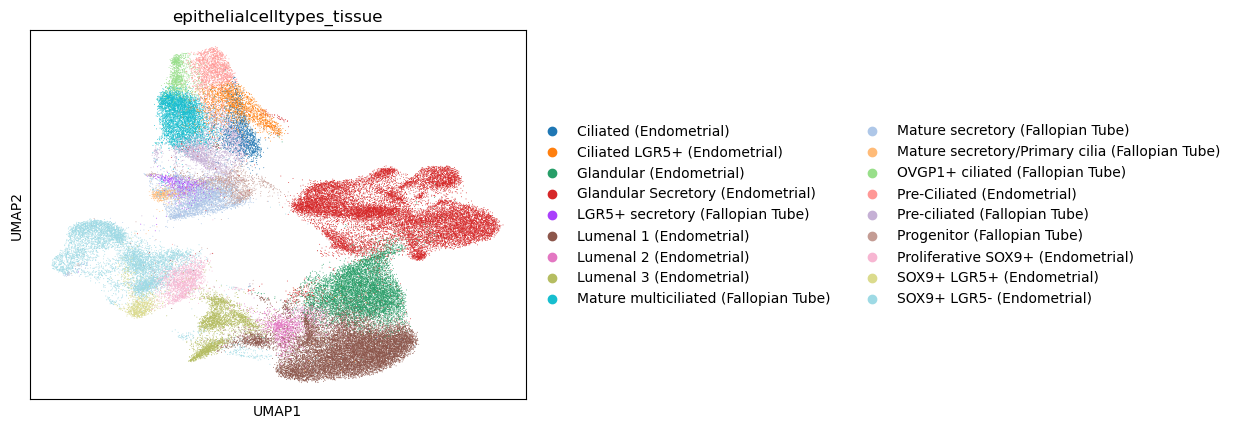

In [107]:
sc.pl.umap(oviendo, color=['epithelialcelltypes_tissue'])

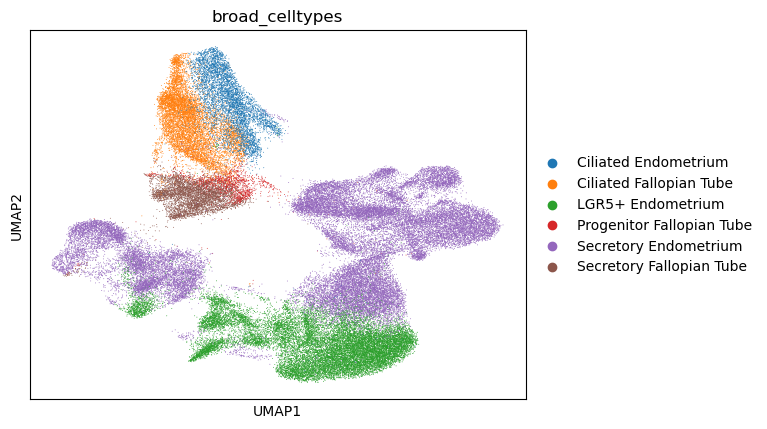

In [50]:
sc.pl.umap(oviendo, color=['broad_celltypes'], save='broadcelltypesoviendonolabels.png')

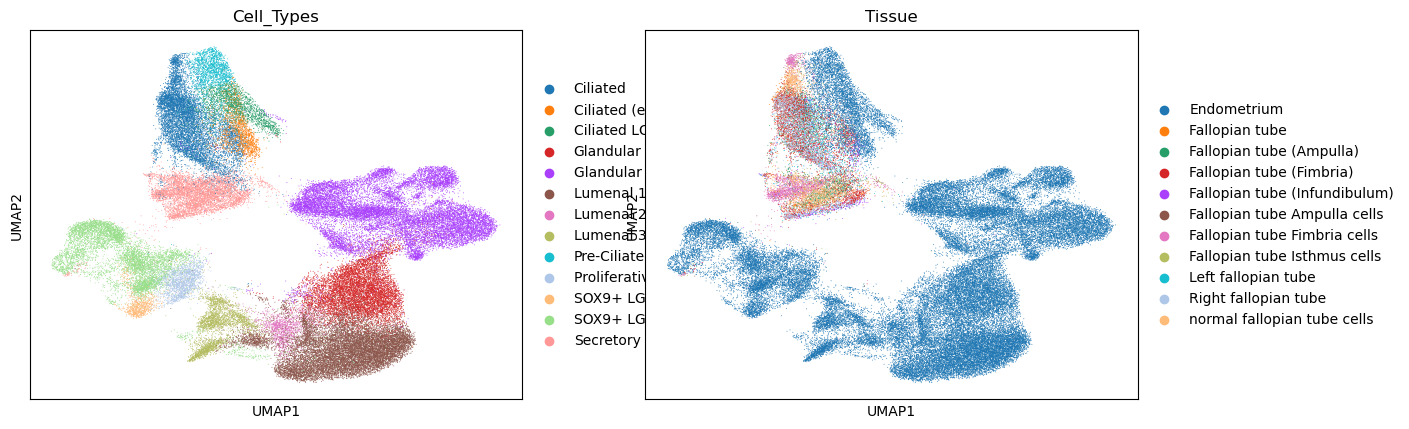

In [116]:
sc.pl.umap(oviendo, color=['Tissue'])

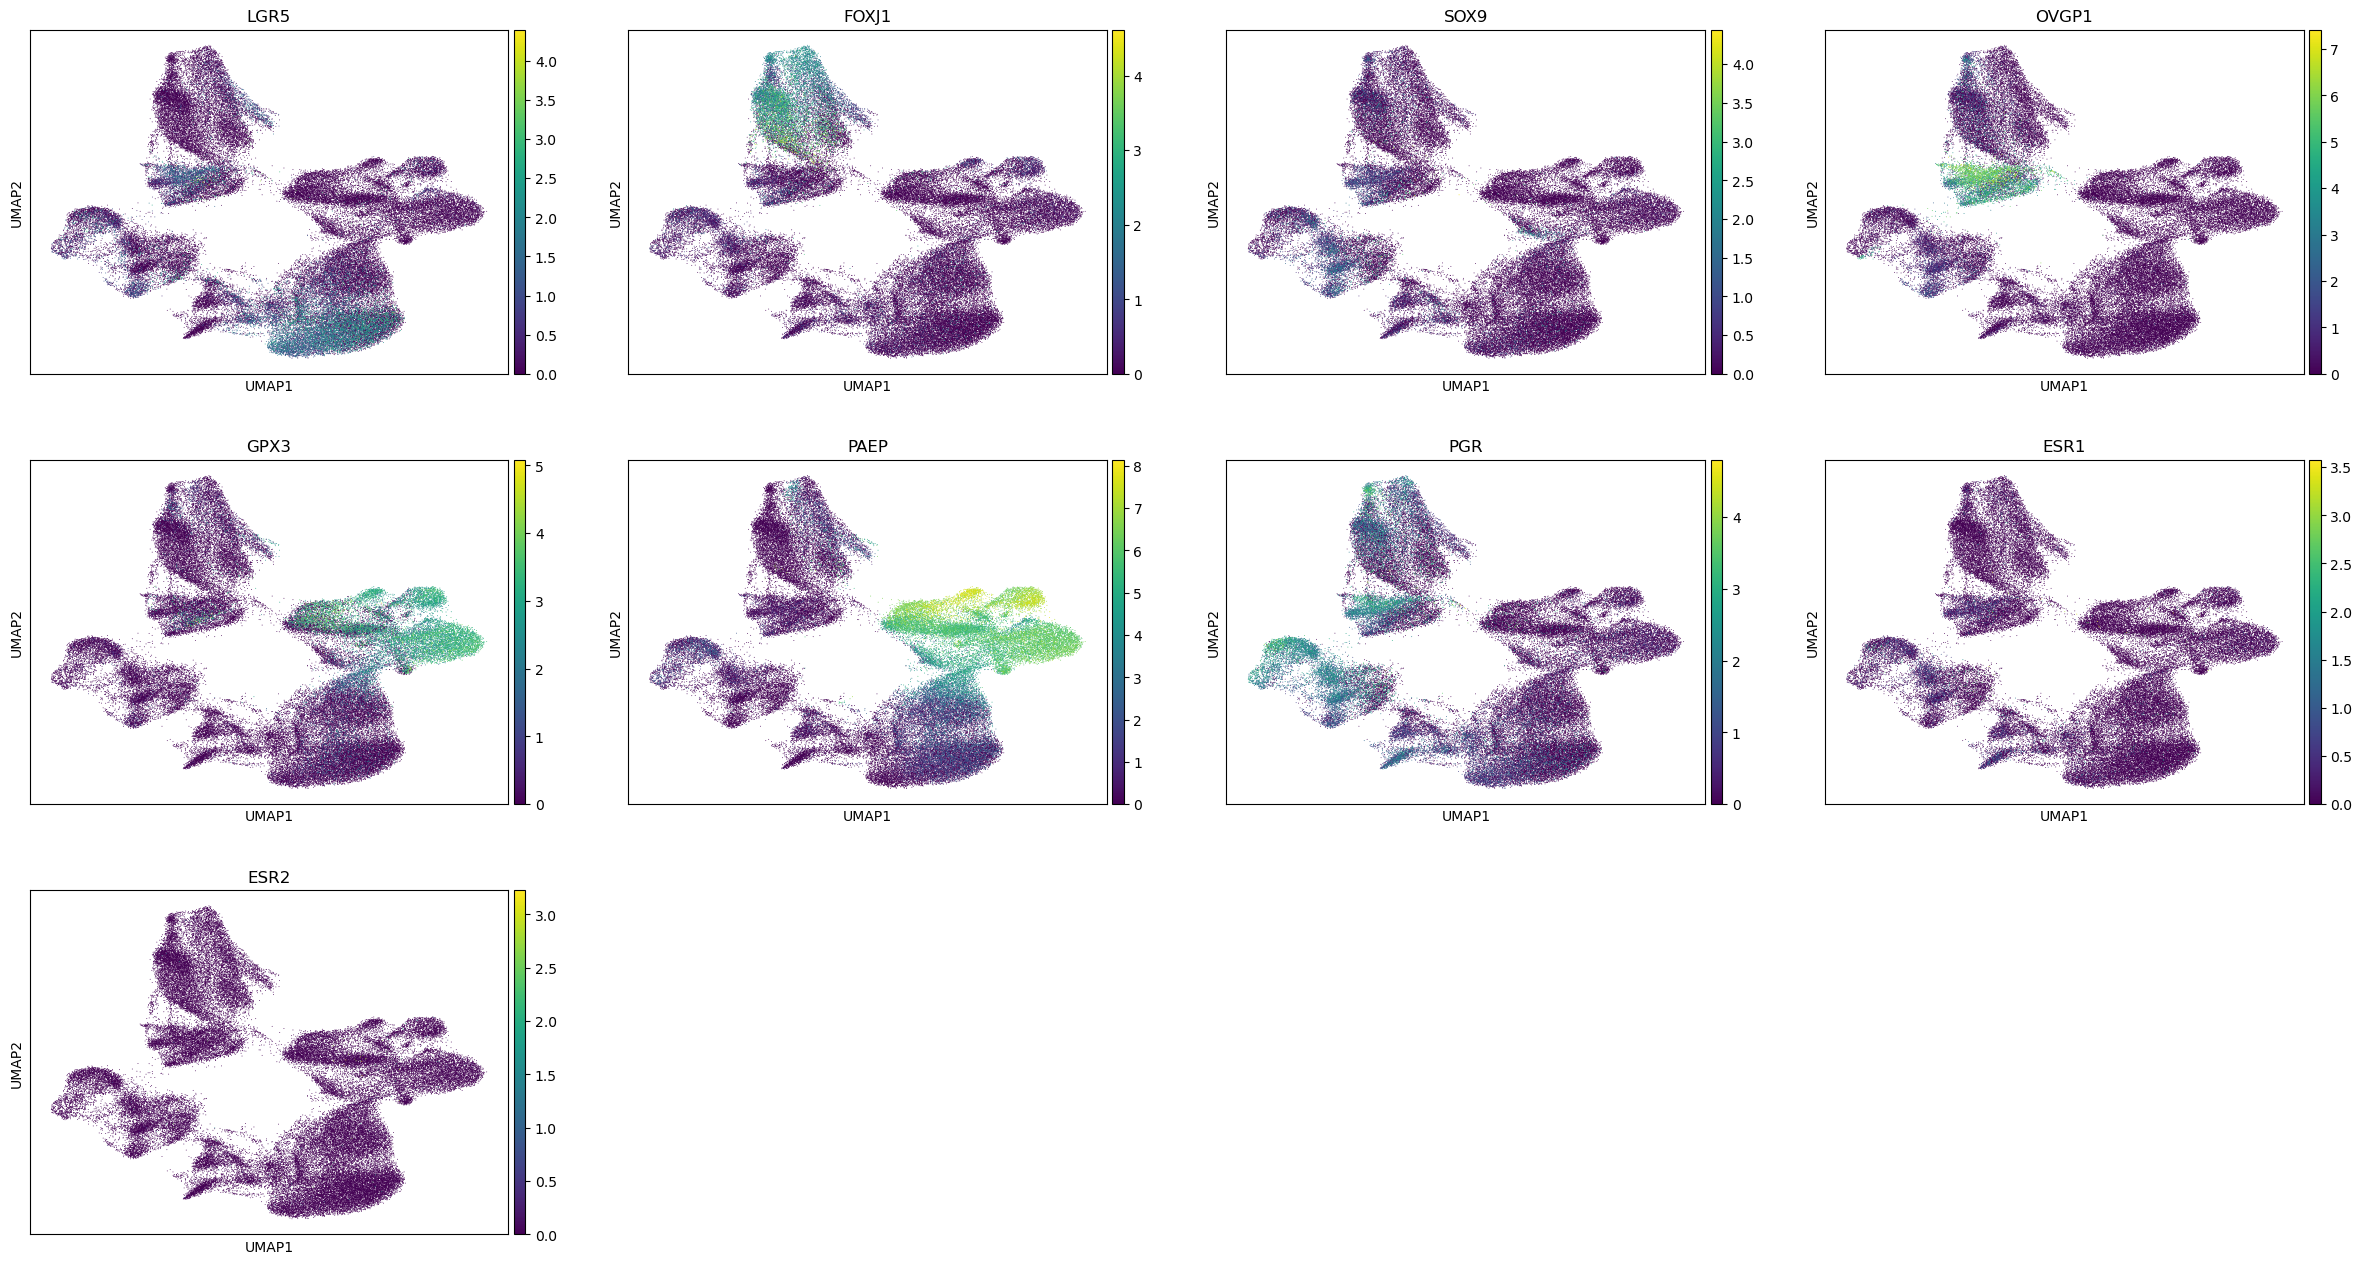

In [52]:
sc.pl.umap(oviendo, color=['LGR5','FOXJ1','SOX9','OVGP1','GPX3','PAEP','PGR','ESR1','ESR2'], save='markergenesallcells.png')

In [13]:
results_file = ('/home/j87832lw/oviduct/oviduct.all/oviendoepithelialcellscombined.h5ad')
oviendo.write(results_file)